# Face Recognition Using Eigenfaces

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im

## Load data

In [2]:
# neutral face
neutral = []

for i in range(200):
    i += 1
    img = im.open(f'dataset/{i}a.jpg').convert('L')
    img = img.resize((58,49), im.ANTIALIAS)
    img2 = np.array(img).flatten() # vectorization
    neutral.append(img2)

In [3]:
faces_matrix = np.vstack(neutral)
faces_matrix.shape

(200, 2842)

In [4]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape

(2842,)

(200, 2842)

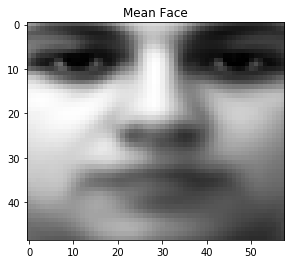

In [5]:
plt.imshow(mean_face.reshape(49,58),cmap='gray'); 
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape

## Compute Covariance

In [6]:
# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

(2842, 2842)

## SVD 
To get eigenvectors.

In [7]:
eigen_vecs, eigen_vals, _ = np.linalg.svd(face_cov)
eigen_vecs.shape

(2842, 2842)

## Visualize first 10 PCs / eigenfaces

Text(0.5, 0.98, 'First 10 Eigenfaces')

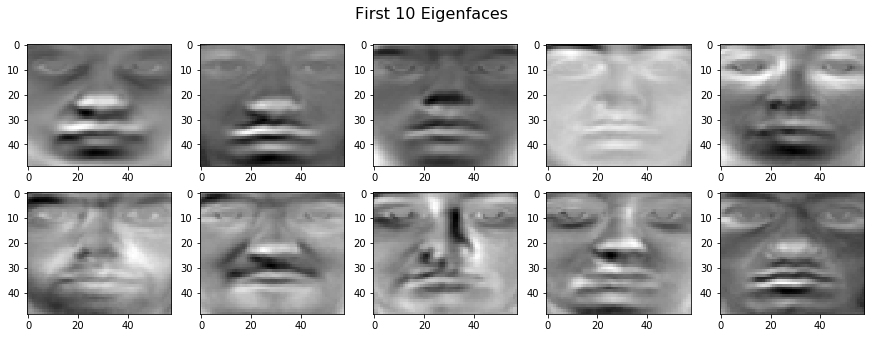

In [8]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs[:,i].reshape(49,58)
    plt.imshow(img, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)

## Reconstruction with Eigenfaces

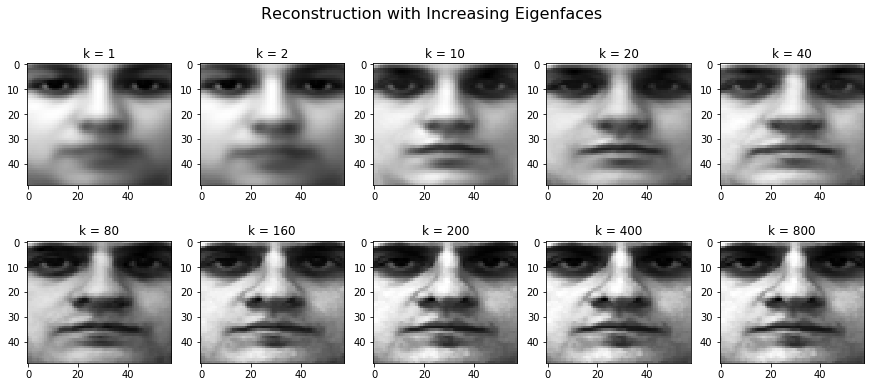

In [9]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,9,19,39,79,159,199,399,799],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[0,:].dot(eigen_vecs[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(49,58)+mean_face.reshape(49,58),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);